### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(123)

In [24]:
df = pd.read_csv('data.csv',index_col=0)
df.head(20)

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0
5,0.303440,5.969639,0
6,-5.920224,1.339210,1
7,-7.555594,0.733846,1
8,5.995393,-4.607815,0
9,1.465613,4.338939,1


In [5]:
df.shape

(10000, 3)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

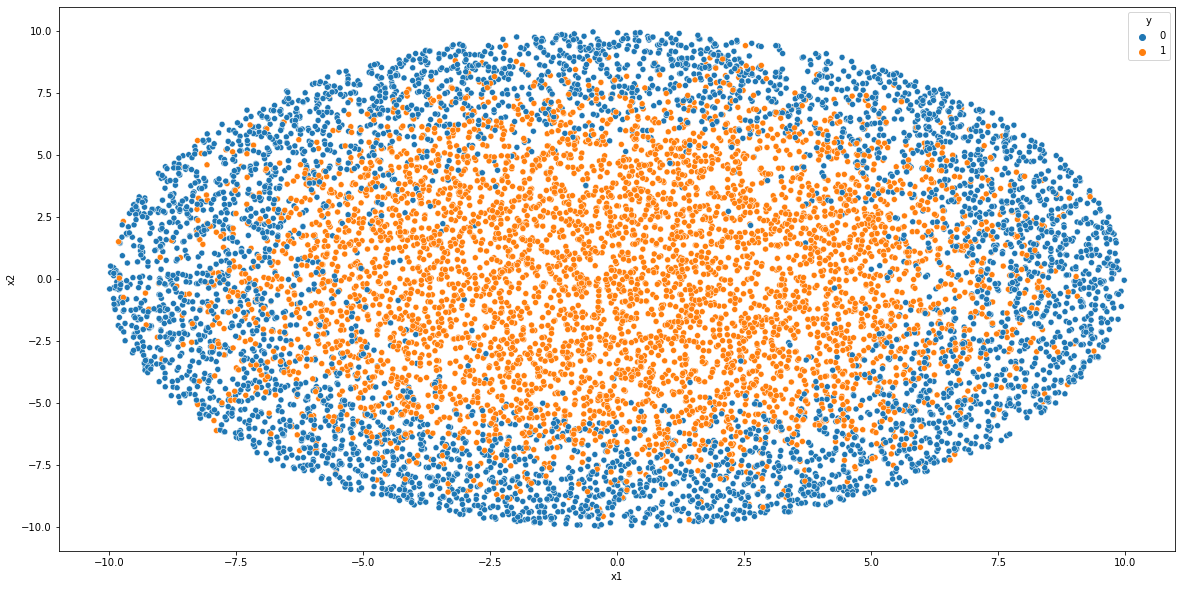

In [6]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 2) (3300, 2) (6700,) (3300,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
Xtrain = scaler.transform(X_train)
Xtest = scaler.transform(X_test)

Точность нашей модели 0.5885074626865672


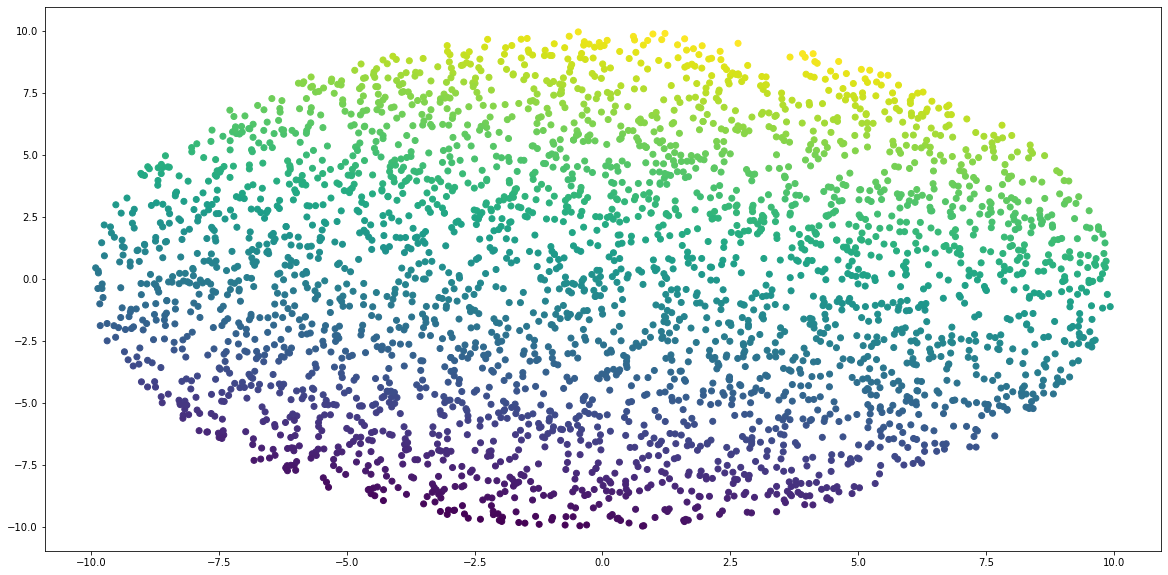

In [10]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train,y_train)


predict_logit =  logr.predict(X_train)
predict_log_proba = logr.predict_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_train)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba[:,1])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.7183582089552238


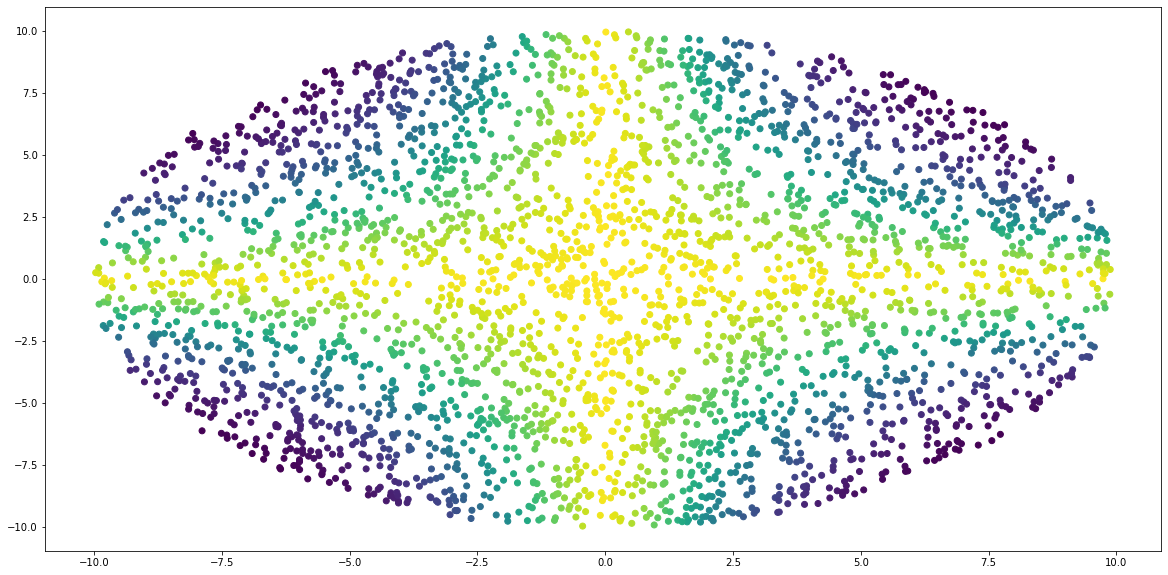

In [35]:
np.random.seed(1)

# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = abs(df_new['x1'] * df_new['x2'])


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                     df_new['y'], test_size = 0.33)


logr.fit(X_train_new,y_train_new)


predict_logit =  logr.predict(X_train_new)
predict_log_proba = logr.predict_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_train_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba[:,1])
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 1.0


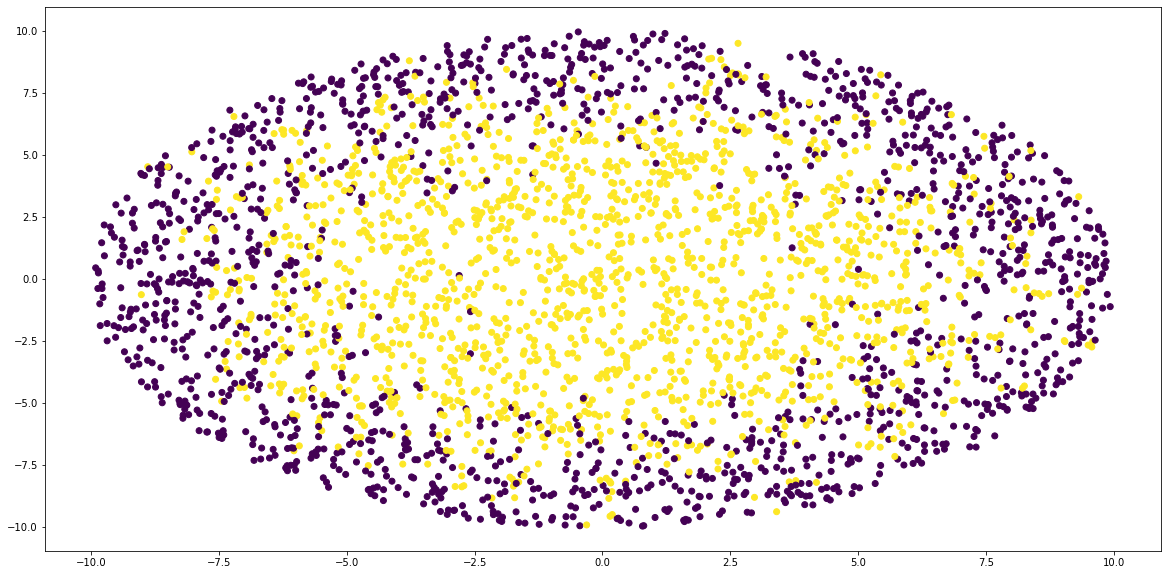

In [12]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
dt = DecisionTreeClassifier(random_state = 123)
dt.fit(X_train, y_train)
predict_tree = dt.predict(X_train)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_train)}')

predict_tree_proba = dt.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba[:,1])
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 1.0


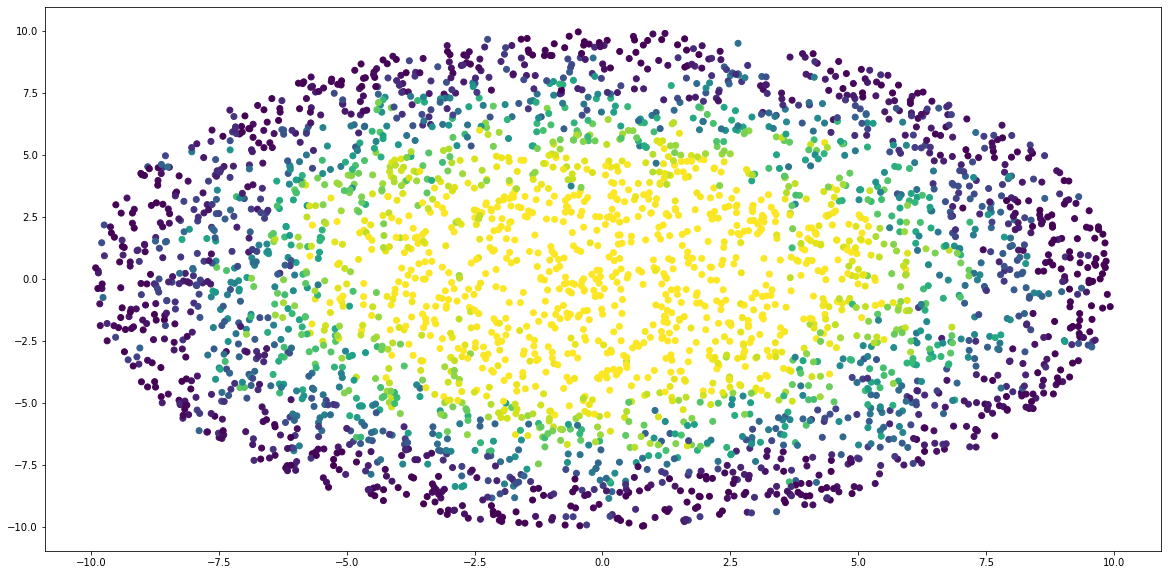

In [13]:
from sklearn.ensemble import RandomForestClassifier

#########################################
rf = RandomForestClassifier(n_estimators = 100, n_jobs=3)
rf.fit(X_train, y_train)
predict_forest = rf.predict(X_train)


print(f'Точность нашей модели {accuracy_score(predict_forest, y_train)}')

predict_forest_proba = rf.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba[:,1])
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [14]:
!pip install --force-reinstall tensorflow

  Using cached tensorflow-2.7.3-cp38-cp38-macosx_10_11_x86_64.whl (213.1 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.7.0-cp38-cp38-macosx_10_9_x86_64.whl (3.2 MB)
  Using cached protobuf-3.19.4-cp38-cp38-macosx_10_9_x86_64.whl (961 kB)
  Using cached tensorflow-2.7.2-cp38-cp38-macosx_10_11_x86_64.whl (213.1 MB)
  Using cached protobuf-4.21.2-cp37-abi3-macosx_10_9_universal2.whl (483 kB)
  Using cached tensorflow-2.7.1-cp38-cp38-macosx_10_11_x86_64.whl (212.7 MB)
  Using cached tensorflow-2.7.0-cp38-cp38-macosx_10_11_x86_64.whl (207.1 MB)
  Using cached tensorflow-2.6.5-cp38-cp38-macosx_10_11_x86_64.whl (205.0 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached google_pasta-0.2.0-py3-non

    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: markdown
    Found existing installation: Markdown 3.3.7
    Uninstalling Markdown-3.3.7:
      Successfully uninstalled Markdown-3.3.7
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.0
    Uninstalling grpcio-1.47.0:
      Successfully uninstalled grpcio-1.47.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: absl-py
    Found existing ins

In [15]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.6.5
2.6.0


In [16]:
model = Sequential()                             
model.add(L.Dense(5, input_shape=(2,)))  
model.add(L.Activation('relu'))            
model.add(L.Dense(5, input_shape=(2,)))                    
model.add(L.Activation('relu')) 
model.add(L.Dense(1, input_shape=(2,)))
model.add(L.Activation('sigmoid'))

2022-06-27 15:21:33.854485: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(loss="binary_crossentropy", 
                  metrics=['acc'], 
                  optimizer=opt.RMSprop(lr=0.001))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 51
Trainable params: 51
Non-trainable params: 0
____________________________________________________________

In [19]:
X_train.shape[0]/51

131.37254901960785

In [21]:
hist = model.fit(X_train, y_train, batch_size=128,epochs=15, verbose=1)

Epoch 1/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4747 - acc: 0.8100
Epoch 2/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4614 - acc: 0.8122
Epoch 3/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4487 - acc: 0.8149
Epoch 4/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4394 - acc: 0.8145
Epoch 5/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4315 - acc: 0.8191
Epoch 6/15
53/53 [==============================] - 0s 3ms/step - loss: 0.4240 - acc: 0.8216
Epoch 7/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4174 - acc: 0.8194
Epoch 8/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4118 - acc: 0.8216
Epoch 9/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4066 - acc: 0.8228
Epoch 10/15
53/53 [==============================] - 0s 2ms/step - loss: 0.4029 - acc: 0.8225
Epoch 11/15
53/53 [==============================] - 0s 2ms/step - lo

Точность нашей модели 0.4890909090909091


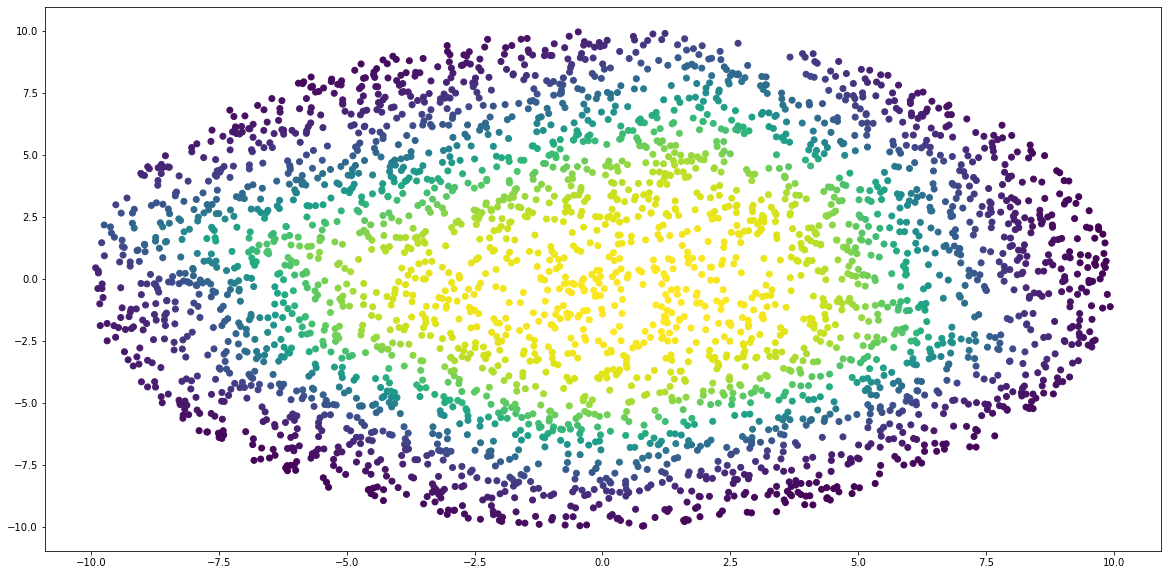

In [22]:
predict_neural = model.predict(X_test)
predict_classes = np.argmax(predict_neural,axis=1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 1ms/step - loss: 0.3852 - acc: 0.8342


На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)